In [3]:
import pandas as pd
import re

df1 = pd.read_csv('./rawdata/sincheon_minwon.csv')
df1.drop(columns=['Unnamed: 0'], inplace=True)
df1.head()

,부서,사업명,제안취지,사업내용
0,자연재난과,무더운 대구의 여름을 위한 물놀이사업,대프리카라고 불리는 대구시에 물놀이장을 각 구마다 설치하여 주민들의 편의를 도모하는...,현재 수도권지역이나 다른 광역시에서는 여름이 되면 각 구마다 물놀이를 할 수 있는...
1,공원녹지과,신천동로 중앙분리대 교각 주변 녹지공간 조성,"○ 신천동로에 있는 신성교, 신천철도교, 신천교, 동신교 중앙분리대 교각 주변 나대...","○ 신천동로 신성교, 신천철도교, 신천교, 동신교 교각 주변 녹지<br> 공간 조..."
2,도시디자인과,참 좋은 일자리가 만들어가는 학교 가는 길,효신초등학교 등굣길에 위치한 구 동부정류장 담벼락 보기 흉한 상태로 방치되어<br>...,"󰋻구 동부정류장 담장 도색 <br>󰋻보호 팬스 설치 후 장미넝쿨 식재<br>󰋻도색,..."
3,NaN,침산교-금호대교 사이 오수배출시설 개선 및 보행자 교각 설치,침산교 – 금호대교 사이 오수 배출시설에 대한 환경 개선 및 보행자 통행을 위한 교...,"○ 신천과 금호강변은 많은 대구시민이 산책(걷기, 마라톤, 자전거 등)을 즐기는 곳..."
4,여성가족정책관,제8회평화와인권을위한대구시민걷기대회 “양성평등한 세상 함께 만들어요!”,일본군‘위안부’문제를 올바르게 해결하고 전쟁 없는 평화로운 미래와 여성인권<br>이...,§ 사 업 명: 제8회평화와인권을위한대구시민걷기대회<br>“양성평등한 세상 함께 만...


In [4]:
#중복행 제거
df1 = df1.drop_duplicates(subset=['사업명'] ,keep='first').reset_index(drop=True)   # 사업명을 기준으로 중복 데이터 18개 삭제


#텍스트 정제
df1['사업명'] = df1['사업명'].apply(lambda x : re.sub(r'[^가-힣]',' ', x))  #한글 빼고 전부 제거
df1['제안취지'] = df1['제안취지'].apply(lambda x : re.sub(r'[^가-힣]',' ', x))  #한글 빼고 전부 제거
df1['사업내용'] = df1['사업내용'].apply(lambda x : re.sub(r'[^가-힣]',' ', x))  #한글 빼고 전부 제거

#모든 내용을 담은 열 생성
df1['text'] = df1['사업명'] + ' ' + df1['제안취지'] + ' ' + df1['사업내용'] + ' '

df1.head()


,부서,사업명,제안취지,사업내용,text
0,자연재난과,무더운 대구의 여름을 위한 물놀이사업,대프리카라고 불리는 대구시에 물놀이장을 각 구마다 설치하여 주민들의 편의를 도모하는...,현재 수도권지역이나 다른 광역시에서는 여름이 되면 각 구마다 물놀이를 할 수 있는...,무더운 대구의 여름을 위한 물놀이사업 대프리카라고 불리는 대구시에 물놀이장을 각 구...
1,공원녹지과,신천동로 중앙분리대 교각 주변 녹지공간 조성,신천동로에 있는 신성교 신천철도교 신천교 동신교 중앙분리대 교각 주변 나대...,신천동로 신성교 신천철도교 신천교 동신교 교각 주변 녹지 공간 조...,신천동로 중앙분리대 교각 주변 녹지공간 조성 신천동로에 있는 신성교 신천철도교...
2,도시디자인과,참 좋은 일자리가 만들어가는 학교 가는 길,효신초등학교 등굣길에 위치한 구 동부정류장 담벼락 보기 흉한 상태로 방치되어 ...,구 동부정류장 담장 도색 보호 팬스 설치 후 장미넝쿨 식재 도색 ...,참 좋은 일자리가 만들어가는 학교 가는 길 효신초등학교 등굣길에 위치한 구 동부정류...
3,NaN,침산교 금호대교 사이 오수배출시설 개선 및 보행자 교각 설치,침산교 금호대교 사이 오수 배출시설에 대한 환경 개선 및 보행자 통행을 위한 교...,신천과 금호강변은 많은 대구시민이 산책 걷기 마라톤 자전거 등 을 즐기는 곳...,침산교 금호대교 사이 오수배출시설 개선 및 보행자 교각 설치 침산교 금호대교 사...
4,여성가족정책관,제 회평화와인권을위한대구시민걷기대회 양성평등한 세상 함께 만들어요,일본군 위안부 문제를 올바르게 해결하고 전쟁 없는 평화로운 미래와 여성인권 이...,사 업 명 제 회평화와인권을위한대구시민걷기대회 양성평등한 세상 함께 만...,제 회평화와인권을위한대구시민걷기대회 양성평등한 세상 함께 만들어요 일본군 위안...


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from konlpy.tag import Okt
from pykospacing import Spacing

okt = Okt()
spacing = Spacing()

#불용어 읽어오기
stopwords = pd.read_csv("stopwords.txt")
stopwords = stopwords['word'].tolist()

"""
#외래어 읽어오기
loanwords = pd.read_csv('loanwords.txt', encoding = 'cp949')
loanwords = loanwords['word'].tolist()
for word in loanwords :
    okt.add_dictionary(word, 'Noun')
"""

c:\Anaconda3\envs\sklearn\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


"\n#외래어 읽어오기\nloanwords = pd.read_csv('loanwords.txt', encoding = 'cp949')\nloanwords = loanwords['word'].tolist()\nfor word in loanwords :\n    okt.add_dictionary(word, 'Noun')\n"

In [6]:
# remove stopwords + tokeninzing
content = df1['text'].tolist()

tks=[]
for sentence in content :
    kospacing_sent = spacing(sentence) # 띄워쓰기 보완
    noun_sent = okt.nouns(kospacing_sent) # 명사만 추출
    over_two_sent = [word for word in noun_sent if len(word) > 1]   # 2글자 이상인 단어만 사용
    stopwords_removed_sentence = [word for word in over_two_sent if not word in stopwords] # 불용어 제거
    tks.append(stopwords_removed_sentence)

clean_sents = []
for tk in tks :
    clean_sents.append(" ".join(tk))

#토큰화된 단어로만 이루어진 DF
df2 = pd.DataFrame(columns=['tokens'], data = clean_sents)
df3 = pd.concat([df1, df2], axis=1)

df3.head()

,부서,사업명,제안취지,사업내용,text,tokens
0,자연재난과,무더운 대구의 여름을 위한 물놀이사업,대프리카라고 불리는 대구시에 물놀이장을 각 구마다 설치하여 주민들의 편의를 도모하는...,현재 수도권지역이나 다른 광역시에서는 여름이 되면 각 구마다 물놀이를 할 수 있는...,무더운 대구의 여름을 위한 물놀이사업 대프리카라고 불리는 대구시에 물놀이장을 각 구...,대구 여름 물놀이 사업 프리 카라 대구시 물놀이 구마 설치 주민 편의 목적 현재 수...
1,공원녹지과,신천동로 중앙분리대 교각 주변 녹지공간 조성,신천동로에 있는 신성교 신천철도교 신천교 동신교 중앙분리대 교각 주변 나대...,신천동로 신성교 신천철도교 신천교 동신교 교각 주변 녹지 공간 조...,신천동로 중앙분리대 교각 주변 녹지공간 조성 신천동로에 있는 신성교 신천철도교...,신천동로 중앙 분리 교각 주변 녹지 공간 조성 신천동로 성교 신천 도교 신천 신교 ...
2,도시디자인과,참 좋은 일자리가 만들어가는 학교 가는 길,효신초등학교 등굣길에 위치한 구 동부정류장 담벼락 보기 흉한 상태로 방치되어 ...,구 동부정류장 담장 도색 보호 팬스 설치 후 장미넝쿨 식재 도색 ...,참 좋은 일자리가 만들어가는 학교 가는 길 효신초등학교 등굣길에 위치한 구 동부정류...,일자리 학교 초등학교 등굣길 위치 정류장 담벼락 보기 상태 방치 도시 미관 크게 훼...
3,NaN,침산교 금호대교 사이 오수배출시설 개선 및 보행자 교각 설치,침산교 금호대교 사이 오수 배출시설에 대한 환경 개선 및 보행자 통행을 위한 교...,신천과 금호강변은 많은 대구시민이 산책 걷기 마라톤 자전거 등 을 즐기는 곳...,침산교 금호대교 사이 오수배출시설 개선 및 보행자 교각 설치 침산교 금호대교 사...,침산교 금호 대교 사이 오수 배출 시설 개선 보행자 교각 설치 침산교 금호 대교 사...
4,여성가족정책관,제 회평화와인권을위한대구시민걷기대회 양성평등한 세상 함께 만들어요,일본군 위안부 문제를 올바르게 해결하고 전쟁 없는 평화로운 미래와 여성인권 이...,사 업 명 제 회평화와인권을위한대구시민걷기대회 양성평등한 세상 함께 만...,제 회평화와인권을위한대구시민걷기대회 양성평등한 세상 함께 만들어요 일본군 위안...,평화 인권 대구 시민 걷기 대회 양성평등 세상 일본군 위안부 문제 해결 전쟁 미래 ...


In [ ]:
clean_sents

In [7]:
## 텍스트 데이터를 단어 빈도수에 기반해 벡터화시키기
# max_df = 토큰이 나타날 최대 문서 개수 -> 소수점이면 비중
# max_features = corpus 중 빈도수가 가장 높은 순으로 해당 개수만큼만 뽑아냄
# min_df = 토큰이 나타날 최소 문서 개수 -> 정수면 횟수
# ngram_range = (min_n, max_n) 튜플, 단어장 생성에 사용할 토큰의 크기를 결정
count_vect = CountVectorizer(max_df=0.95, max_features=1000,
                            min_df=2, ngram_range=(1,1))
# feature 리스케일링 해서 feature 평균이 0 분산이 1 되게 만들어줌
#fit_transfrom은 train dataset에서만 사용
ftr_vect = count_vect.fit_transform(df3['tokens'])

# LDA 클래스 사용해 피쳐 벡터화시킨 거 토픽모델링
# n_components = 토픽개수
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(ftr_vect)

# 각 토픽
print(lda.components_.shape)
# 단어들을 벡터화한 feature
print(lda.components_)

(5, 1000)
[[2.20101518 0.20150739 3.36105287 ... 1.20043162 8.82397627 0.2033385 ]
 [0.20294178 4.19664103 9.79445555 ... 0.20651032 2.67221504 6.26643157]
 [0.20000862 0.20000362 4.20975053 ... 0.2000082  1.71552193 1.43855566]
 [2.19499573 0.20000116 3.64268651 ... 3.19304449 6.63325677 5.87247945]
 [3.20103869 0.2018468  0.99205453 ... 0.20000537 6.15502999 0.21919483]]


In [8]:
# lda_model = 벡터화시킨 텍스트 데이터를 fit까지만 적용한 모델
def display_topic_words(lda_model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(lda_model.components_):
        print('\nTopic #', topic_idx+1)

        # topic 별로 1000개의 features 중에서 높은 값 순으로 정렬 후 index 반환
        #argsort = 디폴트가 오름차순 -> [::-1]로 내림차순으로 변경
        topic_word_idx = topic.argsort()[::-1]
        top_idx = topic_word_idx[:num_top_words]

        # CountVectorizer 함수 할당시킨 객체에 get_feature_names()로 벡터화시킨 features
        # 벡터화시킨 feature는 숫자-알파벳 순으로 정렬, 단어들 순서는 fit_transform 시키고 난 이후에도 동일
        feature_concat = '+'.join([str(feature_names[i])+'*'+str(round(topic[i], 1)) for i in top_idx])
        print(feature_concat)

feature_names = count_vect.get_feature_names()
display_topic_words(lda, feature_names, 10)


Topic # 1
신천*247.6+이용*129.1+설치*96.0+도서관*65.0+시장*60.4+시설*53.8+인도*50.8+대구*48.4+주민*45.9+개선*44.6

Topic # 2
설치*335.2+신천*136.9+도로*108.7+차량*84.0+안전*72.2+사고*63.8+운동*61.7+신천대로*60.8+주민*46.0+차선*42.2

Topic # 3
신천*42.2+보라*42.2+벚꽃*41.2+동산*37.2+화장실*32.0+마을*29.3+공간*29.3+문화*27.3+나무*21.7+조성*19.9

Topic # 4
신천*285.0+설치*190.8+대구*131.4+주민*111.6+사업*98.2+자전거*96.8+지역*85.9+시민*78.1+환경*61.7+공간*52.7

Topic # 5
설치*129.6+신천*115.3+공원*92.5+공간*71.2+조성*63.7+시설*57.3+주민*46.5+이용*40.7+자전거*37.2+벤치*37.2


c:\Anaconda3\envs\sklearn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(tks)
print('Number of unique words in initital documents:', len(dictionary))

# Filter out words that occur less than 10 documents, or more than 20% of the documents.
dictionary.filter_extremes(no_below=2, no_above=0.9)
print('Number of unique words after removing rare and common words:', len(dictionary))

Number of unique words in initital documents: 3467
Number of unique words after removing rare and common words: 1673


In [10]:
corpus = [dictionary.doc2bow(tk) for tk in tks]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 1673
Number of documents: 482


In [11]:
from gensim.models import LdaModel

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

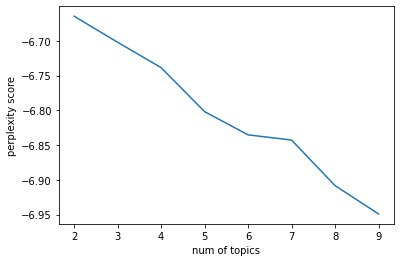

In [12]:
#perplexity : 확률 모델이 결과를 얼마나 정확하게 에측하는지 판단, 낮을수록 좋음
#동일 모델 내 파라미터에 따른 성능평가에 주로 사용, perplexity가 낮다고 해서 결과가 해석 용이한것은 아님

import matplotlib.pyplot as plt
perplexity_values=[]

for i in range(2, 10) :
    model = LdaModel(corpus=corpus, id2word=id2word, num_topics=i)
    perplexity_values.append(model.log_perplexity(corpus))

x=range(2, 10)
plt.plot(x, perplexity_values)
plt.xlabel("num of topics")
plt.ylabel("perplexity score")
plt.show()

#전부 음수여서 좋은 결과는 아닌 것 같음,,,

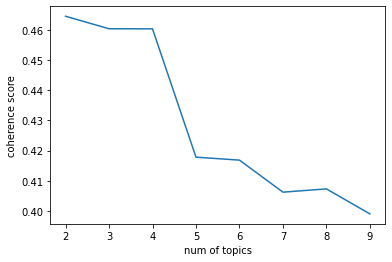

In [13]:
#coherence : 토픽이 얼마나 의미론적으로 일관성 있는지 판단, 높을수록 좋음
#해당 모델이 얼마나 실제로 의미있는 결과를 내는지 확인

from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2, 10) :
    model = LdaModel(corpus=corpus, id2word=id2word, num_topics=i)
    coherence_model_lda = CoherenceModel(model=model, texts=tks, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

x=range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel("num of topics")
plt.ylabel("coherence score")
plt.show()

#2가 최적 개수

In [14]:
# Set training parameters.
num_topics = 4
chunksize = 500 # size of the doc looked at every pass
passes = 20 # number of passes through documents
iterations = 40
eval_every = 1  # Don't evaluate model perplexity, takes too much time.


model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, alpha='auto', eta='auto', \
                iterations=iterations, num_topics=num_topics, passes=passes, eval_every=eval_every)

In [15]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

gensimvis.prepare(model, corpus, dictionary)

c:\Anaconda3\envs\sklearn\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.051771  0.111454       1        1  31.542369
0      0.049536 -0.083204       2        1  26.199179
1      0.115485  0.029257       3        1  26.128322
2     -0.113251 -0.057508       4        1  16.130129, topic_info=     Term        Freq       Total Category  logprob  loglift
182   도서관   79.000000   79.000000  Default  30.0000  30.0000
105   자전거  165.000000  165.000000  Default  29.0000  29.0000
661    인도   70.000000   70.000000  Default  28.0000  28.0000
119    공원  150.000000  150.000000  Default  27.0000  27.0000
753  지하차도   52.000000   52.000000  Default  26.0000  26.0000
..    ...         ...         ...      ...      ...      ...
98     시민   21.118252  180.083123   Topic4  -5.0351  -0.3188
99     시설   18.501478  139.018634   Topic4  -5.1674  -0.1923
332    진입   14.242440   59.637958   Topic4  -5.4291   0.3924
8      사업   17.532255  191.910348   Topic4  -5.2212  -0.5685
377  신천대로   13.576749   95.958425   Topic4  -5.4769  -0.1311

[299 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
650       2  0.230045   가로수
650       3  0.230045   가로수
650       4  0.506100   가로수
79        1  0.596549    강변
79        2  0.153398    강변
...     ...       ...   ...
645       2  0.887371  횡단보도
645       3  0.077163  횡단보도
476       1  0.824214    휴식
476       2  0.066828    휴식
476       3  0.111380    휴식

[492 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])